In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models, metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
import zipfile



In [32]:
!pip install --upgrade --no-cache-dir gdown

!gdown "https://storage.googleapis.com/learning-datasets/beans/train.zip" -O /tmp/train.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/validation.zip" -O /tmp/validation.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/test.zip" -O /tmp/test.zip

Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/train.zip
To: /tmp/train.zip
100% 144M/144M [00:00<00:00, 150MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/validation.zip
To: /tmp/validation.zip
100% 18.5M/18.5M [00:00<00:00, 202MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/test.zip
To: /tmp/test.zip
100% 17.7M/17.7M [00:00<00:00, 110MB/s] 


In [33]:
local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()

In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_dir = '/tmp/train'
valid_dir = '/tmp/validation'



In [35]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

valid_gen = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


In [36]:
#Now create neural architecture. 2 things: create your own architecture, and import a pre-trained model
#1
l_1 = layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224, 224, 3))
l_2 = layers.MaxPooling2D(2,2)

l_3 = layers.Conv2D(64, (3,3), activation = 'relu')
l_4 = layers.Dropout(0.2)
l_5 = layers.MaxPooling2D(2,2)

l_6 = layers.Conv2D(128, (3,3), activation = 'relu')
l_7 = layers.Dropout(0.2)
l_8 = layers.MaxPooling2D(2,2)

l_9 = layers.Flatten()
l_10 = layers.Dense(256, activation='relu')
l_11 = layers.Dense(3, activation='softmax')

model = models.Sequential([
    l_1, l_2, l_3, l_4, l_5, l_6, l_7, l_8, l_9, l_10, l_11
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
#write a callback as well
callbacks = [EarlyStopping(patience=7, restore_best_weights=True), ModelCheckpoint("retrying.h5", save_best_only=True)]

history = model.fit(train_gen, epochs = 20, validation_data = valid_gen, callbacks = callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.3674 - loss: 3.3199

33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 608ms/step - accuracy: 0.3686 - loss: 3.2772 - val_accuracy: 0.5263 - val_loss: 1.0506
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.5362 - loss: 0.9585

33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 538ms/step - accuracy: 0.5364 - loss: 0.9578 - val_accuracy: 0.5865 - val_loss: 0.8963
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.6052 - loss: 0.8396

33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 497ms/step - accuracy: 0.6050 - loss: 0.8402 - val_accuracy: 0.6316 - val_loss: 0.8400
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.6034 - loss: 0.8362

33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 499ms/step - accuracy: 0.6048 - loss: 0.8350 - val_accuracy: 0.7444 - val_loss: 0.6599
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 478ms/step - accuracy: 0.6716 - loss: 0.7444 - val_accuracy: 0.6842 - val_loss: 0.6974
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.6900 - loss: 0.6621

33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 499ms/step - accuracy: 0.6903 - loss: 0.6621 - val_accuracy: 0.7218 - val_loss: 0.6476
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 462ms/step - accuracy: 0.7229 - loss: 0.6353 - val_accuracy: 0.6842 - val_loss: 0.6766
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 498ms/step - accuracy: 0.7211 - loss: 0.6548 - val_accuracy: 0.7143 - val_loss: 0.6884
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 461ms/step - accuracy: 0.7375 - loss: 0.6109 - val_accuracy: 0.7594 - val_loss: 0.6769
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 461ms/step - accuracy: 0.7031 - loss: 0.6366 - val_accuracy: 0.5263 - val_loss: 0.8927
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 490ms/step - accuracy: 0.6642 - loss: 0.7102 - val_accuracy: 0.6617 - val_loss: 0.7742
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.7177 - loss: 0.6564

33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 668ms/step - accuracy: 0.7182 - loss: 0.6553 - val_accuracy: 0.7293 - val_loss: 0.5761
Epoch 13/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 490ms/step - accuracy: 0.7487 - loss: 0.5783 - val_accuracy: 0.8346 - val_loss: 0.6137
Epoch 14/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.7403 - loss: 0.5727

33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 530ms/step - accuracy: 0.7403 - loss: 0.5725 - val_accuracy: 0.7895 - val_loss: 0.5454
Epoch 15/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 462ms/step - accuracy: 0.7524 - loss: 0.5899 - val_accuracy: 0.7444 - val_loss: 0.5857
Epoch 16/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.7756 - loss: 0.5171

33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 522ms/step - accuracy: 0.7755 - loss: 0.5174 - val_accuracy: 0.8421 - val_loss: 0.4670
Epoch 17/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 461ms/step - accuracy: 0.7375 - loss: 0.6003 - val_accuracy: 0.8120 - val_loss: 0.5207
Epoch 18/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 469ms/step - accuracy: 0.7642 - loss: 0.5389 - val_accuracy: 0.7594 - val_loss: 0.5747
Epoch 19/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 489ms/step - accuracy: 0.8005 - loss: 0.4989 - val_accuracy: 0.7068 - val_loss: 0.6973
Epoch 20/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 492ms/step - accuracy: 0.7718 - loss: 0.5375 - val_accuracy: 0.7594 - val_loss: 0.5759


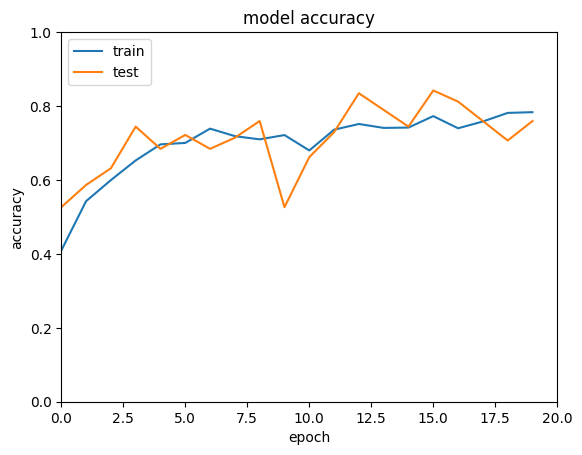

In [38]:
# loaded_model = models.load_model('best_model.h5')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,20])
plt.ylim([0.0,1.0])
plt.show()

In [18]:
#Loading the pretrained model
pre_trained_model = MobileNetV3Small(input_shape = (224, 224, 3), weights = 'imagenet', include_top = False)
for layer in pre_trained_model.layers:
  layer.trainable = False



In [22]:
gap = layers.GlobalAveragePooling2D()(pre_trained_model.output)
dense = layers.Dense(256, activation = 'relu')(gap)
drop = layers.Dropout(0.3)(dense)
prediction = layers.Dense(3, activation='softmax')(drop)

model = models.Model(inputs = pre_trained_model.input, outputs = prediction)

model.compile(optimizer = Adam(0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
callbacks = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint('pre_trained.h5', save_best_only=True)]
history_2 = model.fit(train_gen, validation_data=valid_gen, epochs = 15, callbacks=callbacks)


Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.3239 - loss: 1.1498

33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 883ms/step - accuracy: 0.3236 - loss: 1.1490 - val_accuracy: 0.3308 - val_loss: 1.1029
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.3268 - loss: 1.1167

33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 479ms/step - accuracy: 0.3270 - loss: 1.1166 - val_accuracy: 0.3308 - val_loss: 1.0990
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.3411 - loss: 1.1070

33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 484ms/step - accuracy: 0.3411 - loss: 1.1070 - val_accuracy: 0.3383 - val_loss: 1.0977
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 448ms/step - accuracy: 0.3260 - loss: 1.1183 - val_accuracy: 0.3308 - val_loss: 1.0999
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 443ms/step - accuracy: 0.3337 - loss: 1.1155 - val_accuracy: 0.3383 - val_loss: 1.0985
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 443ms/step - accuracy: 0.3194 - loss: 1.1085 - val_accuracy: 0.3308 - val_loss: 1.0978


In [29]:
plt.plot(history_2.history_2['accuracy'])
plt.plot(history_2.history_2['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,20])
plt.ylim([0.0,1.0])
plt.show()

AttributeError: 'History' object has no attribute 'history_2'